In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use(
    r'U:\DNA-PAINT-SPT\nature_7pt.mplstyle')

# Load data
df_dimers = pd.read_hdf(r'U:\DNA-PAINT-SPT\Fig1G\df_dimers.hdf', key='df_dimers')

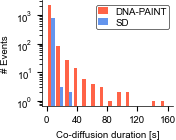

In [5]:
# Plot
f, ax = plt.subplots(1, 1)
f.set_figheight(1.4)
f.set_figwidth(1.7)
rolling = 60

colors = iter(['tomato', 'cornflowerblue'])

df_dimers_exploded = df_dimers.explode(['track_lengths'])

# combine data for side-to-side histogram plot
data_combined = [df_dimers_exploded.loc[(df_dimers_exploded.condition == 'PAINT\\Ligand ch coloc')].track_lengths.values,
                 df_dimers_exploded.loc[(df_dimers_exploded.condition == 'SD\\Ligand ch coloc')].track_lengths.values]

for condition in df_dimers.condition.unique():
    df_C = df_dimers_exploded.loc[(df_dimers_exploded.condition == condition)]
    # determnine number of bins
    _, bins = np.histogram(df_dimers_exploded.track_lengths, bins='sturges')
    ax.hist(data_combined,
            color=['tomato', 'cornflowerblue'],
            bins=len(bins),
            histtype='bar',
            stacked=False,
            zorder=100)
    ax.set_yscale('log')
ax.set_xticks(np.arange(0, 4450, step=1000))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/25:.0f}'))
ax.set_xlabel('Co-diffusion duration [s]')
ax.set_ylabel('# Events')
leg = ax.legend(labels=['DNA-PAINT', 'SD'], loc='upper right',
                handlelength=1, borderpad=0.2, labelspacing=0.2, edgecolor='black')
leg.get_frame().set_linewidth(.5)
